✅ Dataset loaded successfully!
🔹 Running Agglomerative Hierarchical Clustering...

📊 Evaluation Metrics for Agglomerative Hierarchical Clustering:
Silhouette Score: 0.3306 (Higher = Better)
Davies-Bouldin Index: 1.2229 (Lower = Better)
Calinski-Harabasz Index: 2243.1204 (Higher = Better)



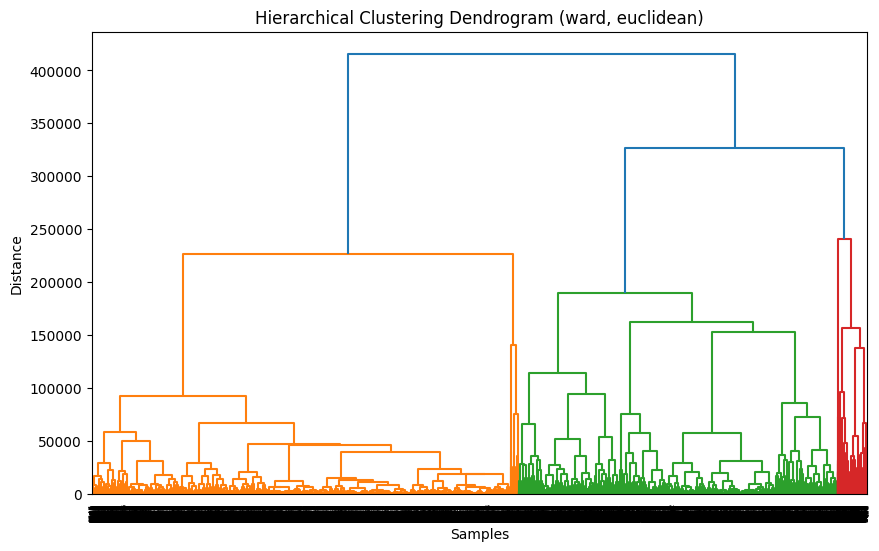

🔹 Running K-Means Clustering...

📊 Evaluation Metrics for K-Means Clustering:
Silhouette Score: 0.3921 (Higher = Better)
Davies-Bouldin Index: 1.3210 (Lower = Better)
Calinski-Harabasz Index: 2683.5314 (Higher = Better)



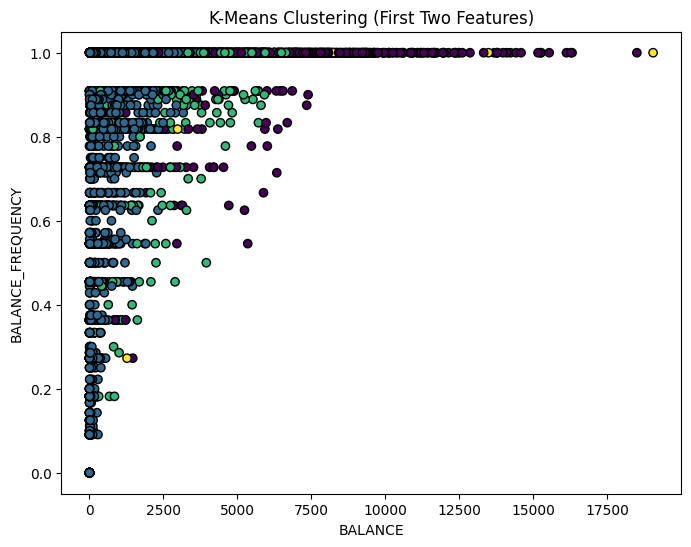

In [4]:
# --- Import required libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.cluster.hierarchy import linkage, dendrogram

# --- 1. Load the dataset ---
# ⚠️ Replace the path below with the actual location of your CSV file
cc_data = pd.read_csv(r'/Users/krishnaprasath/Documents/CC GENERAL - CC GENERAL.csv')
print("✅ Dataset loaded successfully!")

# --- 2. Data preprocessing ---
# Drop non-numeric or identifier columns and fill missing values
X = cc_data.drop(['CUST_ID', 'TENURE'], axis=1).fillna(0)

# --- 3. Agglomerative Hierarchical Clustering function ---
def hierarchical_clustering(X, n_clusters=4, method='ward', metric='euclidean'):
    """
    Perform Agglomerative (Hierarchical) Clustering.
    Uses 'metric' instead of deprecated 'affinity' (for sklearn >= 1.4).
    """
    model = AgglomerativeClustering(n_clusters=n_clusters, linkage=method, metric=metric)
    labels = model.fit_predict(X)
    return labels

# --- 4. K-Means Clustering function ---
def kmeans_clustering(X, n_clusters=4):
    """
    Perform K-Means clustering.
    """
    model = KMeans(n_clusters=n_clusters, random_state=42)
    labels = model.fit_predict(X)
    return labels

# --- 5. Evaluate Clustering Metrics ---
def evaluate_clustering(X, labels, algorithm):
    """
    Print evaluation metrics for clustering performance.
    """
    silhouette = silhouette_score(X, labels)
    db_index = davies_bouldin_score(X, labels)
    ch_index = calinski_harabasz_score(X, labels)
    
    print(f"\n📊 Evaluation Metrics for {algorithm}:")
    print(f"Silhouette Score: {silhouette:.4f} (Higher = Better)")
    print(f"Davies-Bouldin Index: {db_index:.4f} (Lower = Better)")
    print(f"Calinski-Harabasz Index: {ch_index:.4f} (Higher = Better)\n")

# --- 6. Visualize Hierarchical Clustering Dendrogram ---
def hierarchical_dendrogram(X, method='ward', metric='euclidean'):
    """
    Display a dendrogram to visualize hierarchical cluster merging.
    """
    linkage_matrix = linkage(X, method=method, metric=metric)
    plt.figure(figsize=(10, 6))
    dendrogram(linkage_matrix)
    plt.title(f'Hierarchical Clustering Dendrogram ({method}, {metric})')
    plt.xlabel('Samples')
    plt.ylabel('Distance')
    plt.show()

# --- 7. Visualize K-Means Clusters (2D projection) ---
def plot_kmeans_clusters(X, labels):
    """
    Plot first two features with cluster coloring.
    """
    plt.figure(figsize=(8, 6))
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='viridis', marker='o', edgecolors='k')
    plt.title('K-Means Clustering (First Two Features)')
    plt.xlabel(X.columns[0])
    plt.ylabel(X.columns[1])
    plt.show()

# --- 8. Run Agglomerative Hierarchical Clustering ---
print("🔹 Running Agglomerative Hierarchical Clustering...")
hierarchical_labels = hierarchical_clustering(X)
evaluate_clustering(X, hierarchical_labels, 'Agglomerative Hierarchical Clustering')
hierarchical_dendrogram(X)

# --- 9. Run K-Means Clustering ---
print("🔹 Running K-Means Clustering...")
kmeans_labels = kmeans_clustering(X)
evaluate_clustering(X, kmeans_labels, 'K-Means Clustering')
plot_kmeans_clusters(X, kmeans_labels)
